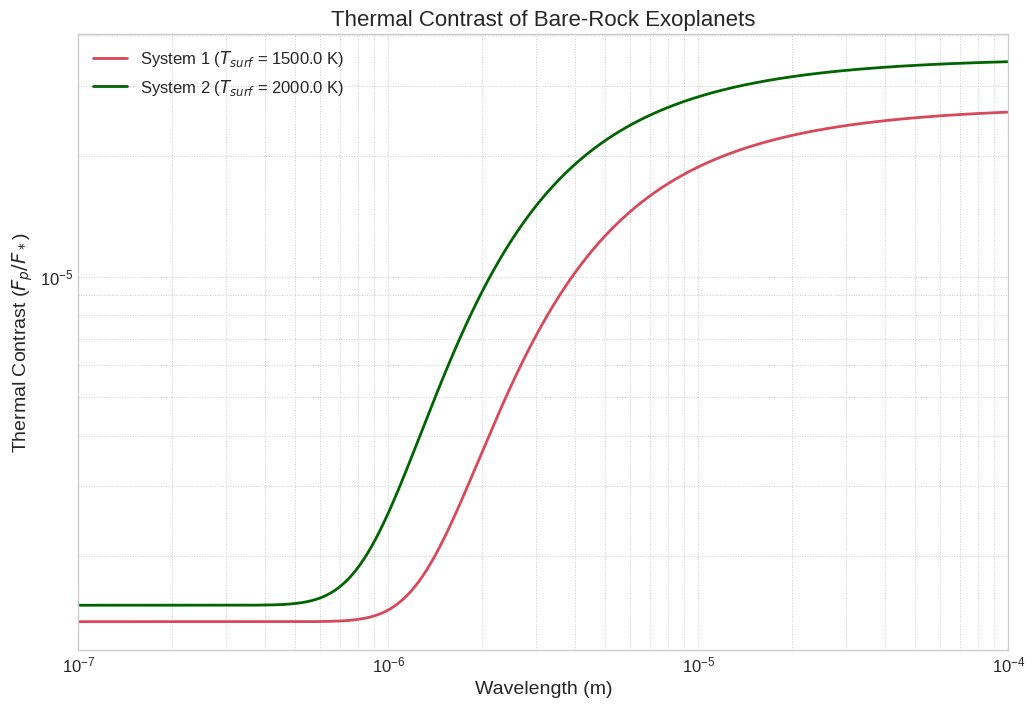

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Import astropy modules as seen in the Appendix ---
import astropy.units as u
from astropy.constants import c, h, k_B, R_sun, R_earth
# import fontTools
# print(fontTools)
sky_blue = '#87CEEB'   # sky blue
dark_blue = '#00008B'   # dark blue
light_green = '#93C572' # light green
dark_green = '#006400'  # dark green
light_purple = '#FFADFF' # light purple
orange = '#FFA500' # orange
orange_pink = '#D84858'   # orange-pink
purple = '#733B73' # purple
green = '#006400' # green

#Colors
colors_molecules = {"CO2": sky_blue, "CO": light_green, "CH4": light_purple}
colors_molecules_sys1 = {"CO2": sky_blue, "CO": dark_green, "CH4": light_purple}
colors_molecules_sys2 = {"CO2": dark_blue, "CO": light_green, "CH4": purple}
colors_systems = {"System 1": orange_pink, "System 2": green}
colors_albedos = {0.0: orange_pink, 0.3: green, 0.7: purple, 1.0: sky_blue}

# --- 2. Define the Planck Function using astropy quantities (Corrected) ---
def planck_function(wav, T):
    """
    Calculates the Planck function B(lambda, T) using astropy units.

    Args:
        wav (astropy.Quantity): Wavelength(s) as an astropy Quantity (e.g., in meters).
        T (astropy.Quantity): Temperature as an astropy Quantity (in Kelvin).

    Returns:
        astropy.Quantity: The result of the Planck function calculation.
    """
    term1 = (2.0 * h * c**2) / (wav**5)
    term2 = np.exp((h * c) / (wav * k_B * T)) - 1.0
    return term1 / term2

# --- 3. Define Planetary System Parameters from Table 4.2 with astropy units ---
# The parameters are taken directly from Table 4.2 of the manual.
system1_params = {
    "name": "System 1",
    "T_surf": 1500.0 * u.K,
    "T_star": 5000.0 * u.K,
    "Ag": 0.3,                      # Geometric Albedo is dimensionless
    "a": 0.01992 * u.AU,
    "Rp": 1.0 * R_earth,
    "R_star": 1.0 * R_sun,
}

system2_params = {
    "name": "System 2",
    "T_surf": 2000.0 * u.K,
    "T_star": 5000.0 * u.K,
    "Ag": 0.3,                      # Geometric Albedo is dimensionless
    "a": 0.019 * u.AU,
    "Rp": 1.0 * R_earth,
    "R_star": 1.0 * R_sun,
}

# --- 4. Function to Calculate Thermal Contrast using astropy ---
def calculate_barerock_contrast(wav, params):
    """
    Calculates the thermal contrast (Fp/F*) for a bare-rock planet.
    This function uses the simplified version of Equation 3.2.

    Args:
        wav (astropy.Quantity): Wavelength array.
        params (dict): Dictionary of system parameters with astropy units.

    Returns:
        astropy.Quantity: The dimensionless thermal contrast.
    """
    # Unpack parameters
    Rp = params["Rp"]
    R_star = params["R_star"]
    a = params["a"]
    Ag = params["Ag"]
    T_surf = params["T_surf"]
    T_star = params["T_star"]

    # Calculate planet and star flux using the Planck function
    B_planet = planck_function(wav, T_surf)
    B_star = planck_function(wav, T_star)

    # Calculate the two terms of the equation.
    # astropy handles the conversion of AU, R_sun, and R_earth to base units.
    # .decompose() ensures the final result is a simple dimensionless quantity.

    # Term 1: Thermal Emission
    thermal_emission_term = ((Rp / R_star)**2 * (B_planet / B_star)).decompose()

    # Term 2: Reflected Light
    reflected_light_term = ((Rp / a)**2 * Ag).decompose()

    return thermal_emission_term + reflected_light_term

# --- 5. Generate and Plot the Spectra ---

# Define a wavelength range from 1e-7 to 1e-4 meters using astropy units
wavelengths = np.logspace(-7, -4, 1000) * u.m

# Calculate the contrast for each system
contrast1 = calculate_barerock_contrast(wavelengths, system1_params)
contrast2 = calculate_barerock_contrast(wavelengths, system2_params)

# Create the plot
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

# We must use the .value of the quantities for plotting
# Plotting with wavelength in meters
ax.plot(wavelengths.to_value(u.m), contrast1.value, lw=2,
        label=f'{system1_params["name"]} ($T_{{surf}}$ = {system1_params["T_surf"]})',color=colors_systems["System 1"])
ax.plot(wavelengths.to_value(u.m), contrast2.value, lw=2,
        label=f'{system2_params["name"]} ($T_{{surf}}$ = {system2_params["T_surf"]})',color=colors_systems["System 2"])

# Formatting the plot
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Wavelength (m)', fontsize=14) # Changed label to meters
ax.set_ylabel('Thermal Contrast ($F_p / F_*$)', fontsize=14)
ax.set_title('Thermal Contrast of Bare-Rock Exoplanets', fontsize=16)
ax.legend(fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlim(1e-7, 1e-4) # Set limits appropriate for meters
ax.grid(True, which="both", ls=':', linewidth=0.7)
# plt.grid(False)

plt.show()

Calculating contrast for different albedo values...
Plotting complete.


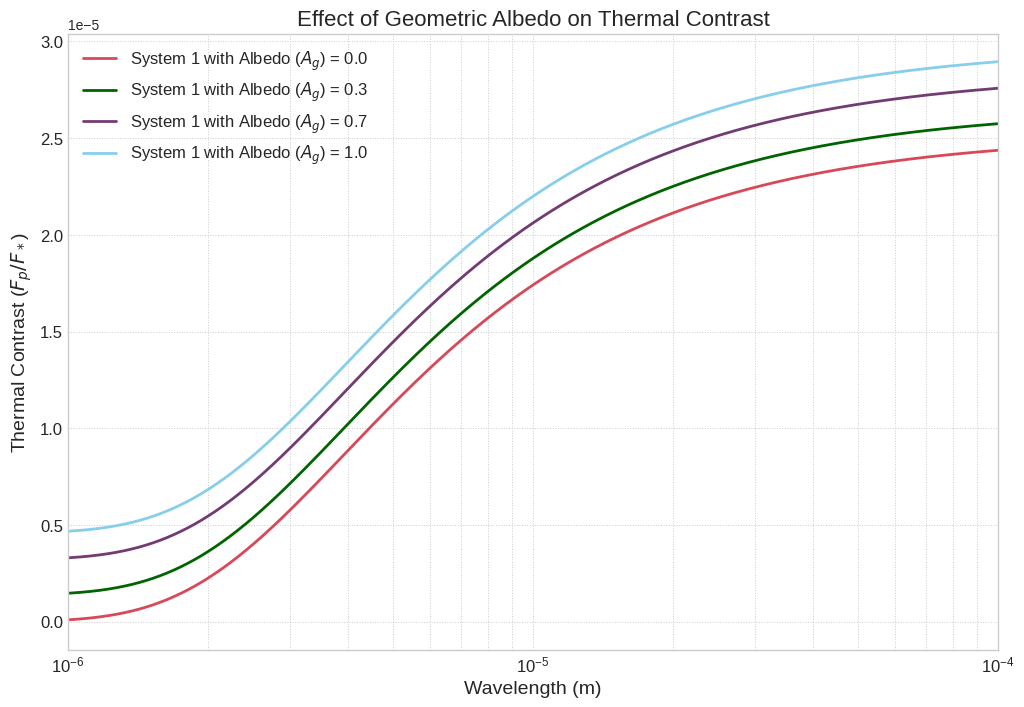

In [89]:
# This code assumes the previous cell defining functions and parameters has been run.
# It addresses Exercise 4.4, Question 2.

import copy # <-- ADD THIS LINE TO FIX THE ERROR

# List of albedos to plot, as per the exercise question
albedo_values = [0.0, 0.3, 0.7, 1.0]

# Define a wavelength range from 1e-7 to 1e-4 meters
wavelengths = np.logspace(-7, -4, 1000) * u.m

# Create the plot
# plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

print("Calculating contrast for different albedo values...")
for albedo in albedo_values:
    # Use a deep copy to avoid modifying the original system1_params dictionary
    # from the previous cell.
    current_params = copy.deepcopy(system1_params)
    current_params["Ag"] = albedo

    # Calculate the contrast for the current albedo
    contrast = calculate_barerock_contrast(wavelengths, current_params)

    # Plot the result
    ax.plot(wavelengths.to_value(u.m), contrast.value, lw=2,
            label=f'System 1 with Albedo ($A_g$) = {albedo}',color=colors_albedos[albedo])

print("Plotting complete.")

# Formatting the plot
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel('Wavelength (m)', fontsize=14)
ax.set_ylabel('Thermal Contrast ($F_p / F_*$)', fontsize=14)
ax.set_title('Effect of Geometric Albedo on Thermal Contrast', fontsize=16)
ax.legend(fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlim(1e-6, 1e-4)
ax.grid(True, which="both", ls=':', linewidth=0.7)
# plt.grid(False)

plt.show()

Loading cross-section data and converting to opacity...
Processing complete.
Generating plot...


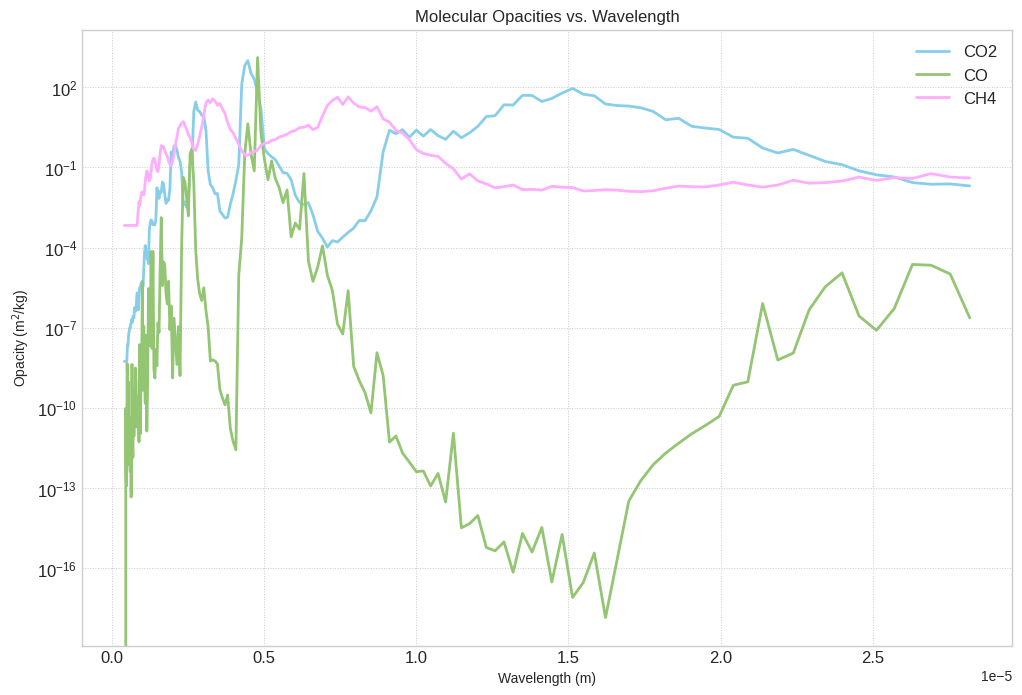

In [90]:
# ==============================================================================
# SCRIPT TO PLOT OPACITY vs. WAVELENGTH
# ==============================================================================
# This script reads cross-section data, converts it to opacity, and plots
# the result on a log-log scale with meter-based units.

# --- 0. IMPORTS ---
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.constants import c, h, k_B, R_sun, R_earth

# --- 1. DEFINE MOLECULAR WEIGHTS ---
MW = {
    "CO2": 44.01 * u.u,
    "CO":  28.01 * u.u,
    "CH4": 16.04 * u.u
}

# --- 2. DEFINE HELPER FUNCTIONS ---
def read_cross_section_dat(filepath):
    """
    Reads a file assuming:
    Col 0: Wavelength (cm)
    Col 1: Cross-section (cm^2)
    """
    try:
        wavelength_vals, cross_section_vals = np.loadtxt(filepath, usecols=(0, 1), unpack=True)
    except Exception as e:
        print(f"Could not read {filepath}. Error: {e}")
        raise e

    # Attach the correct initial units (cm and cm^2)
    wavelength = wavelength_vals * u.cm
    cross_section = cross_section_vals * u.cm**2

    # Sort data by ascending wavelength for plotting
    sort_indices = np.argsort(wavelength)
    return wavelength[sort_indices], cross_section[sort_indices]

def cross_section_to_opacity(cross_section, molecular_weight):
    """
    Converts cross-section per molecule to opacity per mass.
    The result is converted to m^2/kg.
    """
    mass_per_molecule = molecular_weight.to(u.kg)
    # astropy handles the unit conversion from cm^2 to m^2 automatically
    return (cross_section / mass_per_molecule).to(u.m**2 / u.kg)


# --- 3. LOAD DATA AND GENERATE OPACITIES ---
opacities_from_dat = {}
molecules = ["CO2", "CO", "CH4"]
base_path = "/content/drive/MyDrive/Colab_Notebooks/exoplanetary_atmos_data/"

print("Loading cross-section data and converting to opacity...")
for molecule in molecules:
    filepath = f"{base_path}cross_sections_{molecule}.dat"
    # Read the data with cm units
    wav_cm, sigma_cm2 = read_cross_section_dat(filepath)
    # Convert to opacity in m^2/kg
    kappa_m2_kg = cross_section_to_opacity(sigma_cm2, MW[molecule])

    # Store the results for plotting (wavelengths are kept as astropy quantities)
    opacities_from_dat[molecule] = (wav_cm, kappa_m2_kg)
print("Processing complete.")


# --- 4. GENERATE PLOT ---
print("Generating plot...")
fig, ax = plt.subplots(figsize=(12, 8))
light_green = '#93C572'
# Loop through the processed data to plot each molecule
for molecule, (wavelength, opacity) in opacities_from_dat.items():
    # Convert quantities to meter-scale values for plotting
    wavelength_m = wavelength.to_value(u.m)
    opacity_m2_kg = opacity.to_value(u.m**2 / u.kg)

    ax.plot(wavelength_m, opacity_m2_kg, lw=2, label=molecule, color = colors_molecules[molecule])

# --- Formatting the plot ---
ax.set_title("Molecular Opacities vs. Wavelength")
ax.set_xlabel("Wavelength (m)")
ax.set_ylabel("Opacity (m$^2$/kg)")
# ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, which="both", ls=':', linewidth=0.7)
# plt.grid(False)
plt.show()

In [91]:
# Cell to inspect the data file structure
# Please run this cell and paste the output in our next chat.

filepath_to_inspect = "/content/drive/MyDrive/Colab_Notebooks/exoplanetary_atmos_data/cross_sections_CH4.dat"

try:
    with open(filepath_to_inspect, 'r') as f:
        print(f"--- First 5 lines of {filepath_to_inspect} ---\n")
        for i in range(5):
            line = f.readline()
            # Stop if we reach the end of the file
            if not line:
                break
            print(f"Line {i+1}: {line.strip()}")
        print("\n--- End of preview ---")
except FileNotFoundError:
    print(f"Error: The file was not found at {filepath_to_inspect}")
    print("Please double-check the path and file name.")
except Exception as e:
    print(f"An error occurred: {e}")

--- First 5 lines of /content/drive/MyDrive/Colab_Notebooks/exoplanetary_atmos_data/cross_sections_CH4.dat ---

Line 1: 4.07380277804e-05    1.78627937745e-25    4.45932174382e-26    0.199771466112
Line 2: 4.1686938347e-05    1.78627937745e-25    4.04890512023e-26    0.184782802086
Line 3: 4.26579518802e-05    1.78627937745e-25    3.67696327854e-26    0.170705884448
Line 4: 4.3651583224e-05    1.78627937745e-25    3.33980025229e-26    0.157518473828
Line 5: 4.46683592151e-05    1.78627937745e-25    3.03408632562e-26    0.145193268616

--- End of preview ---


Loading cross-section data...
Data loaded successfully.
Generating high-resolution plots with fixed albedo...


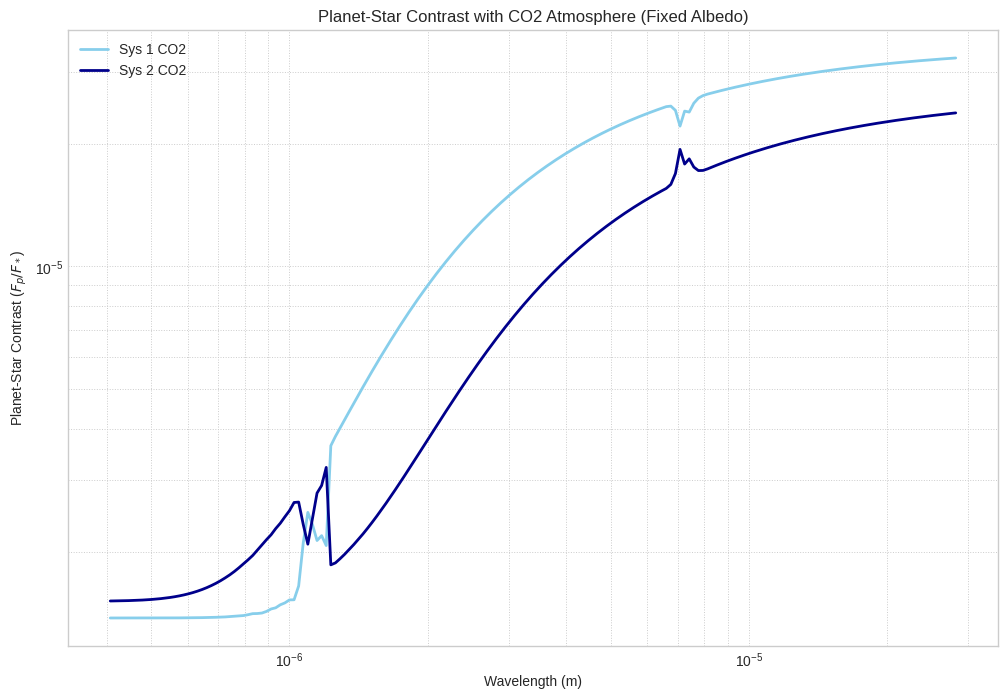

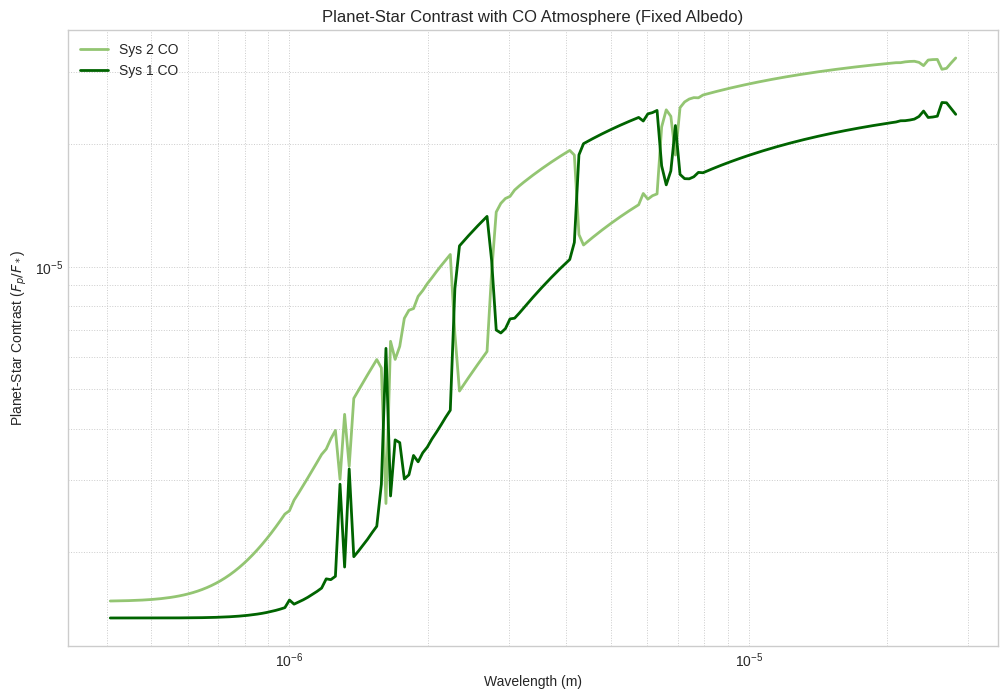

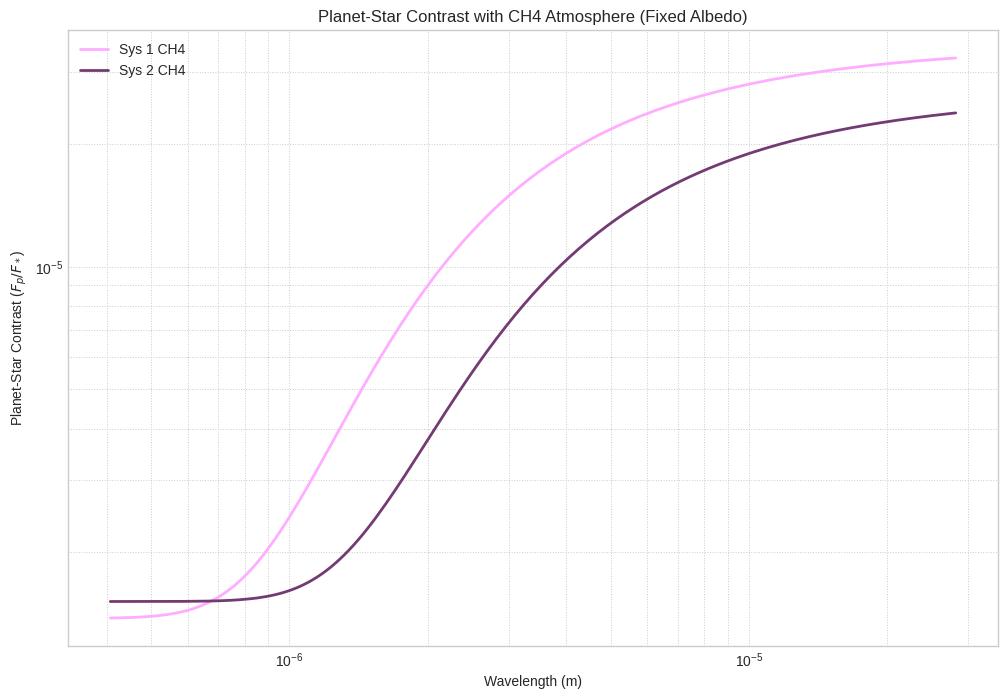

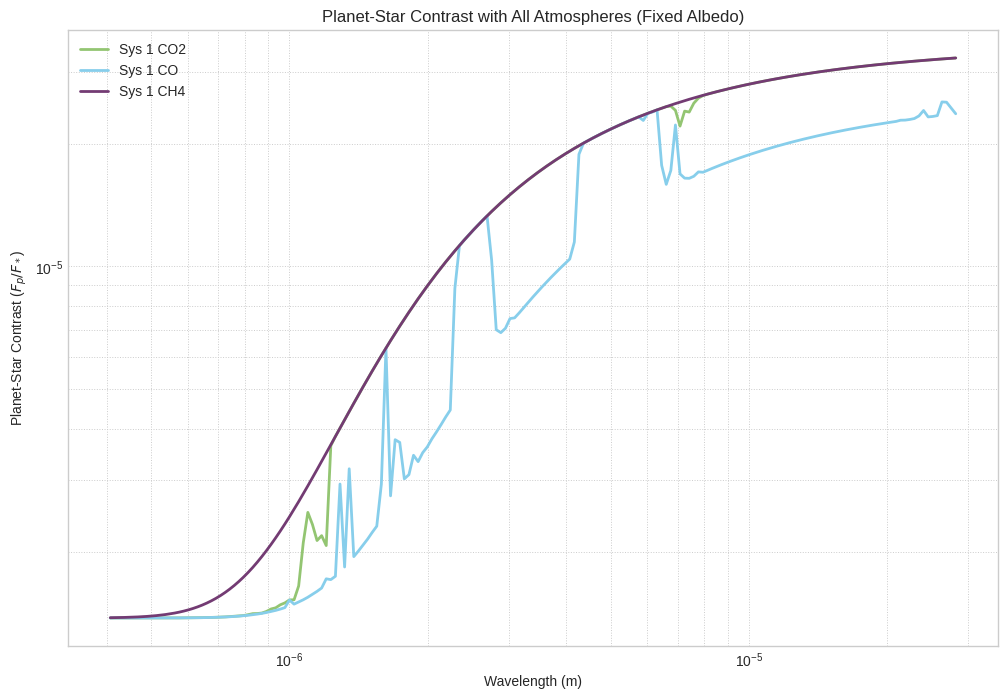

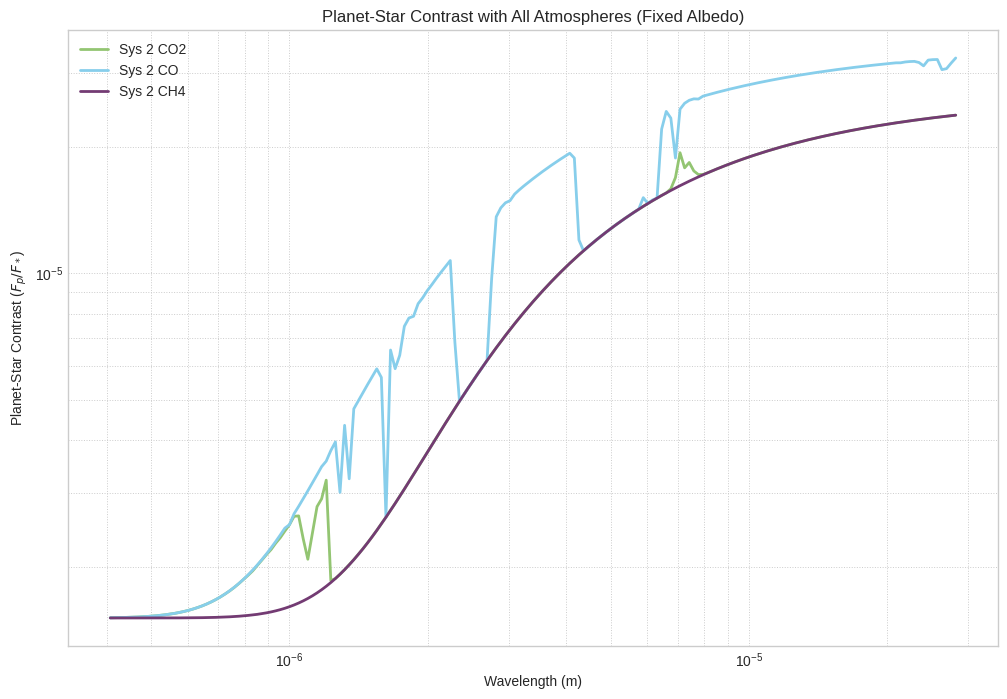

In [102]:
# ==============================================================================
# SCRIPT TO PLOT THERMAL EMISSION WITH A FIXED ALBEDO
# ==============================================================================
# This script calculates and plots the spectra using a single, fixed value
# for the geometric albedo (Ag = 0.3).

# --- 0. IMPORTS ---
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import astropy.units as u
from astropy.constants import c, h, k_B, R_sun, R_earth

# --- 1. DEFINE PLANETARY SYSTEM PARAMETERS (from Table 4.2) ---
system1_params = {
    "name": "Sys 1",
    "T_surf": 1500.0 * u.K,
    "T_atmos": 2000.0 * u.K,
    "P_surf": (1e5 * u.Pa),
    "g": (9.8 * u.m/u.s**2),
    "Rp": 1.0 * R_earth,
    "a": 0.01992 * u.au,
    "Ag": 0.3, # This fixed value will now be used
    "T_star": 5000.0 * u.K,
    "R_star": 1.0 * R_sun,
}

system2_params = {
    "name": "Sys 2",
    "T_surf": 2000.0 * u.K,
    "T_atmos": 1500.0 * u.K,
    "P_surf": (1e5 * u.Pa),
    "g": (9.8 * u.m/u.s**2),
    "Rp": 1.0 * R_earth,
    "a": 0.019 * u.au,
    "Ag": 0.3, # This fixed value will now be used
    "T_star": 5000.0 * u.K,
    "R_star": 1.0 * R_sun,
}

# --- 2. DEFINE MOLECULAR WEIGHTS ---
MW = {
    "CO2": 44.01 * u.u,
    "CO":  28.01 * u.u,
    "CH4": 16.04 * u.u
}

# --- 3. DEFINE HELPER FUNCTIONS ---
def read_cross_section_cgs(filepath):
    """
    Reads a file assuming CGS units (cm, cm^2). Ignores omega data.
    """
    try:
        # Only read the first two columns for wavelength and cross-section
        wavelength_vals, cross_section_vals = np.loadtxt(filepath, usecols=(0, 1), unpack=True)
    except Exception as e:
        print(f"Could not read {filepath}. Error: {e}")
        raise e

    wavelength = wavelength_vals * u.cm
    cross_section = cross_section_vals * u.cm**2
    sort_indices = np.argsort(wavelength)
    return wavelength[sort_indices], cross_section[sort_indices]

def cross_section_to_opacity(cross_section, molecular_weight):
    """Converts cross-section per molecule to opacity per mass."""
    mass_per_molecule = molecular_weight.to(u.kg)
    return (cross_section / mass_per_molecule).to(u.m**2 / u.kg)

def planck_function(wav, T):
    """Calculates the Planck function B(lambda, T)."""
    term1 = (2.0 * h * c**2) / (wav**5)
    term2 = np.exp((h * c) / (wav * k_B * T)) - 1.0
    return term1 / term2

def calculate_rocky_planet_contrast(wavelengths, opacities, params):
    """
    Calculates thermal contrast using the fixed albedo from the params dictionary.
    """
    tau = (opacities * params["P_surf"] / params["g"]).to_value(u.dimensionless_unscaled)

    B_planet_surf = planck_function(wavelengths, params["T_surf"])
    B_planet_atmos = planck_function(wavelengths, params["T_atmos"])
    B_star = planck_function(wavelengths, params["T_star"])

    emitted_flux_numerator = B_planet_surf * np.exp(-tau) + (1 - np.exp(-tau)) * B_planet_atmos

    thermal_term = ((params["Rp"] / params["R_star"])**2 * (emitted_flux_numerator / B_star)).decompose()

    # Use the fixed albedo value from the dictionary
    reflected_term = ((params["Rp"] / params["a"])**2 * params["Ag"]).decompose()

    return thermal_term + reflected_term

# --- 4. LOAD DATA ---
opacities_from_dat = {}
molecules = ["CO2", "CO", "CH4"]
base_path = "/content/drive/MyDrive/Colab_Notebooks/exoplanetary_atmos_data/"

print("Loading cross-section data...")
for molecule in molecules:
    filepath = f"{base_path}cross_sections_{molecule}.dat"
    wav, sigma = read_cross_section_cgs(filepath)
    kappa = cross_section_to_opacity(sigma, MW[molecule])
    opacities_from_dat[molecule] = (wav, kappa)
print("Data loaded successfully.")

# --- 5. GENERATE PLOTS (HIGHEST RESOLUTION) ---
systems = [system1_params, system2_params]
colors = {"Sys 1": colors_molecules_sys1, "Sys 2": colors_molecules_sys2}

print("Generating high-resolution plots with fixed albedo...")

# --- PLOT 1: CO2 ---
fig_co2, ax_co2 = plt.subplots(figsize=(12, 8))
native_wav, native_kappa = opacities_from_dat['CO2']
for system in systems:
    native_contrast = calculate_rocky_planet_contrast(native_wav, native_kappa, system)
    ax_co2.plot(native_wav.to_value(u.m), native_contrast.value, lw=2.0,
            label=f'{system["name"]} CO2', color=colors[system["name"]]['CO2'])

ax_co2.set_title("Planet-Star Contrast with CO2 Atmosphere (Fixed Albedo)")
ax_co2.set_ylabel('Planet-Star Contrast ($F_p / F_*$)')
ax_co2.set_xlabel('Wavelength (m)')
ax_co2.legend()
ax_co2.grid(True, which="both", ls=':', linewidth=0.7)
ax_co2.set_xscale('log')
ax_co2.set_yscale('log')
plt.show()

# --- PLOT 2: CO ---
fig_co, ax_co = plt.subplots(figsize=(12, 8))
native_wav, native_kappa = opacities_from_dat['CO']
for system in systems[::-1]:
    native_contrast = calculate_rocky_planet_contrast(native_wav, native_kappa, system)
    ax_co.plot(native_wav.to_value(u.m), native_contrast.value, lw=2.0,
            label=f'{system["name"]} CO', color=colors[system["name"]]['CO'])

ax_co.set_title("Planet-Star Contrast with CO Atmosphere (Fixed Albedo)")
ax_co.set_ylabel('Planet-Star Contrast ($F_p / F_*$)')
ax_co.set_xlabel('Wavelength (m)')
ax_co.legend()
ax_co.grid(True, which="both", ls=':', linewidth=0.7)
ax_co.set_xscale('log')
ax_co.set_yscale('log')
plt.show()

# --- PLOT 3: CH4 ---
fig_ch4, ax_ch4 = plt.subplots(figsize=(12, 8))
native_wav, native_kappa = opacities_from_dat['CH4']
for system in systems:
    native_contrast = calculate_rocky_planet_contrast(native_wav, native_kappa, system)
    ax_ch4.plot(native_wav.to_value(u.m), native_contrast.value, lw=2.0,
            label=f'{system["name"]} CH4', color=colors[system["name"]]['CH4'])

ax_ch4.set_title("Planet-Star Contrast with CH4 Atmosphere (Fixed Albedo)")
ax_ch4.set_ylabel('Planet-Star Contrast ($F_p / F_*$)')
ax_ch4.set_xlabel('Wavelength (m)')
ax_ch4.legend()
ax_ch4.grid(True, which="both", ls=':', linewidth=0.7)
ax_ch4.set_xscale('log')
ax_ch4.set_yscale('log')
plt.show()

# Fixed Albedo Sys 1 and Sys 2 all Atmosphere combined plot

colors = {"CO2": light_green, "CO":sky_blue, "CH4":purple}
for system in systems:
  fig_combined, ax_combined = plt.subplots(figsize=(12, 8))
  for molecule, (wav, kappa) in opacities_from_dat.items():
        contrast = calculate_rocky_planet_contrast(wav, kappa, system)
        ax_combined.plot(wav.to_value(u.m), contrast.value, lw=2.0,
                label=f'{system["name"]} {molecule}', color=colors[molecule])
        ax_combined.legend()
        ax_combined.grid(True, which="both", ls=':', linewidth=0.7)
        ax_combined.set_xscale('log')
        ax_combined.set_yscale('log')
        ax_combined.set_title("Planet-Star Contrast with All Atmospheres (Fixed Albedo)")
        ax_combined.set_ylabel('Planet-Star Contrast ($F_p / F_*$)')
        ax_combined.set_xlabel('Wavelength (m)')
        ax_combined.legend()
        ax_combined.grid(True, which="both", ls=':', linewidth=0.7)
        ax_combined.set_xscale('log')
        ax_combined.set_yscale('log')
  plt.show()
  ax_combined.clear()


Loading data (including omega) from files...
Data loaded successfully.
Generating high-resolution plots with calculated albedo...


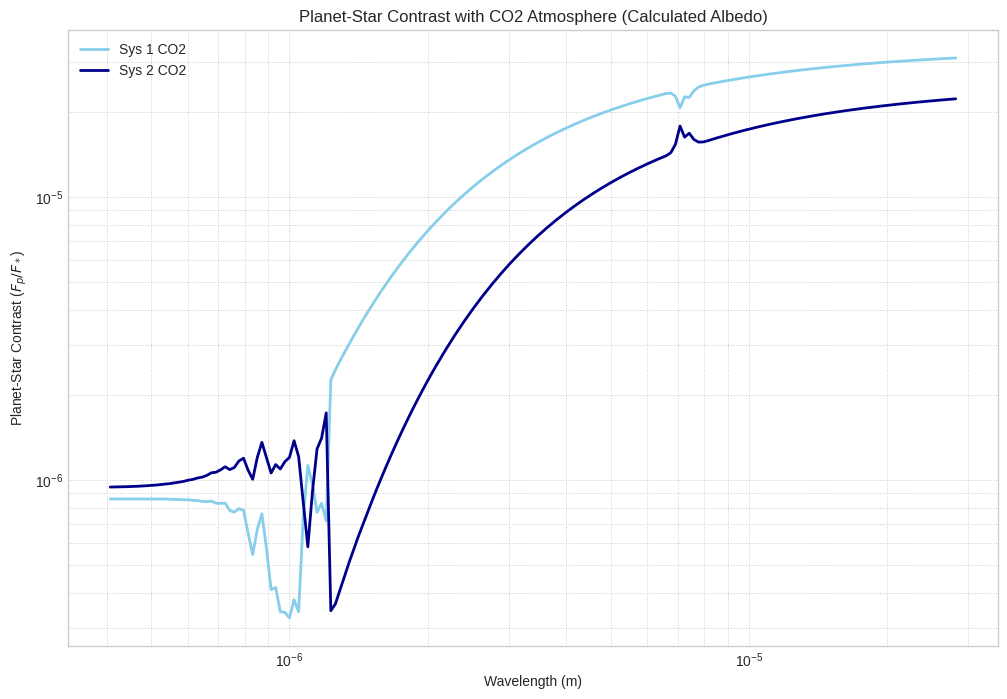

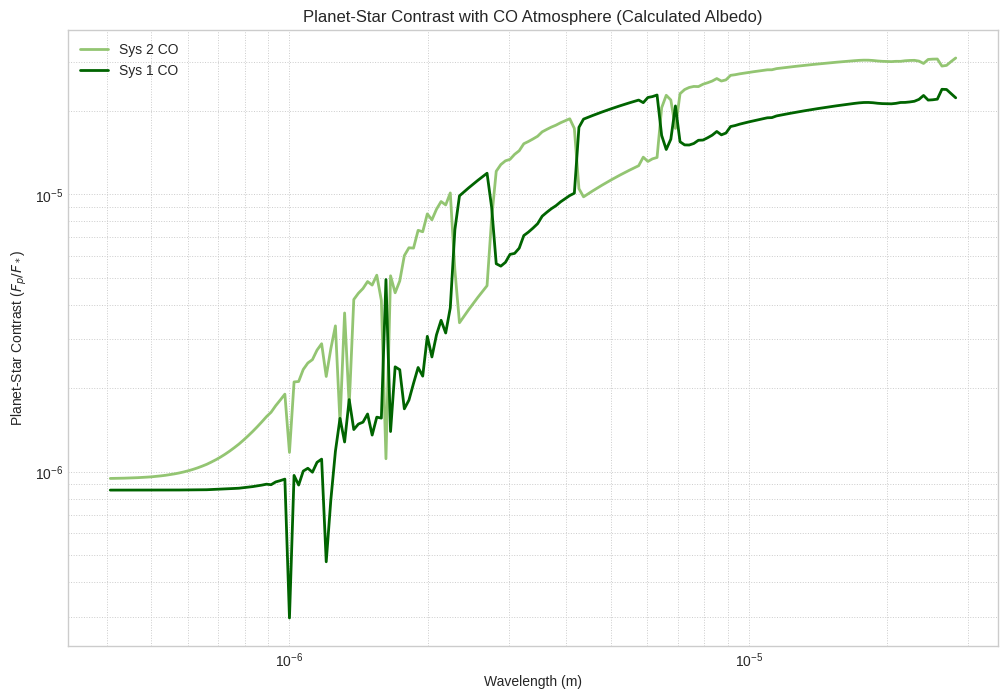

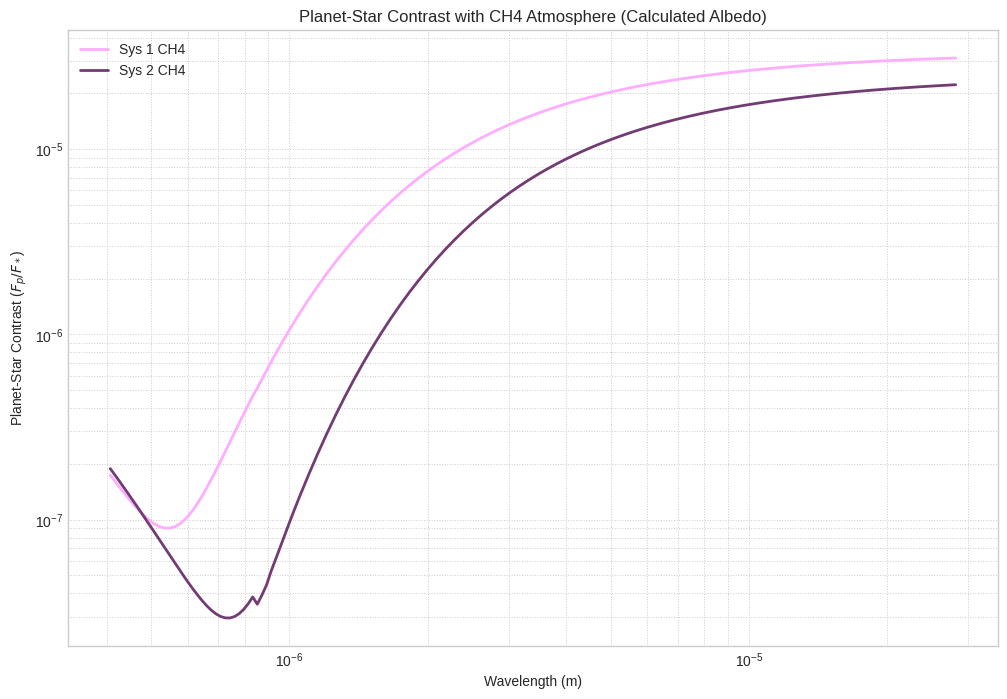

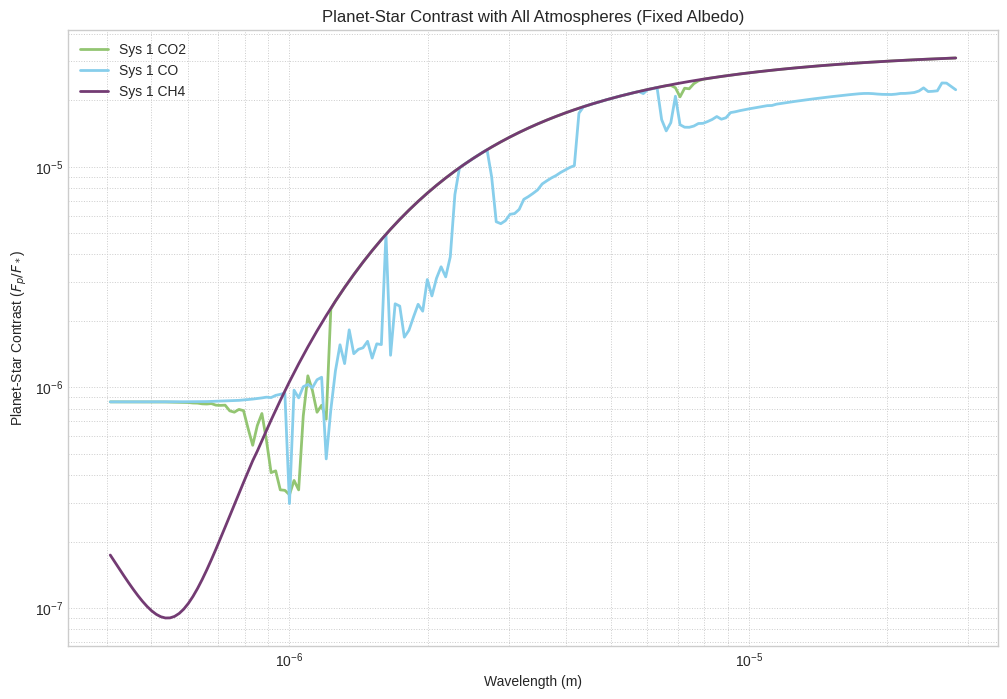

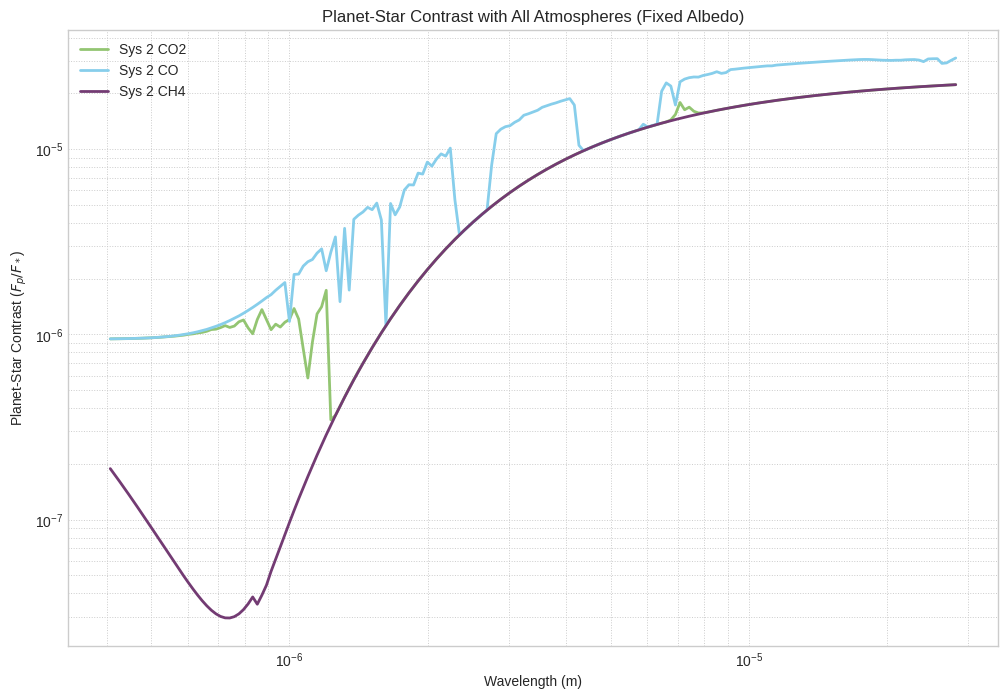

In [105]:
# ==============================================================================
# SCRIPT TO PLOT THERMAL EMISSION WITH ALBEDO CALCULATED FROM OMEGA
# ==============================================================================
# This script reads the omega value from the data files and uses Equation 3.5
# from the manual to model a wavelength-dependent albedo.

# --- 0. IMPORTS ---
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import astropy.units as u
from astropy.constants import c, h, k_B, R_sun, R_earth

# --- 1. DEFINE PLANETARY SYSTEM PARAMETERS (from Table 4.2) ---
# Note: The 'Ag' value here will be ignored and replaced by the calculated albedo.
system1_params = {
    "name": "Sys 1",
    "T_surf": 1500.0 * u.K, "T_atmos": 2000.0 * u.K, "P_surf": (1e5 * u.Pa),
    "g": (9.8 * u.m/u.s**2), "Rp": 1.0 * R_earth, "a": 0.01992 * u.au,
    "Ag": 0.3, "T_star": 5000.0 * u.K, "R_star": 1.0 * R_sun
}

system2_params = {
    "name": "Sys 2",
    "T_surf": 2000.0 * u.K, "T_atmos": 1500.0 * u.K, "P_surf": (1e5 * u.Pa),
    "g": (9.8 * u.m/u.s**2), "Rp": 1.0 * R_earth, "a": 0.019 * u.au,
    "Ag": 0.3, "T_star": 5000.0 * u.K, "R_star": 1.0 * R_sun
}

# --- 2. DEFINE MOLECULAR WEIGHTS ---
MW = {
    "CO2": 44.01 * u.u, "CO":  28.01 * u.u, "CH4": 16.04 * u.u
}

# --- 3. DEFINE HELPER FUNCTIONS ---
def read_cgs_data_with_omega(filepath):
    """
    Reads a file assuming CGS units and returns wavelength, cross-section, and omega.
    Col 0: Wavelength (cm), Col 1: Cross-section (cm^2), Col 3: Omega
    """
    try:
        # UPDATED: Read columns 0, 1, and 3
        wavelength_vals, cross_section_vals, omega_vals = np.loadtxt(filepath, usecols=(0, 1, 3), unpack=True)
    except Exception as e:
        print(f"Could not read {filepath}. Error: {e}")
        raise e

    wavelength = wavelength_vals * u.cm
    cross_section = cross_section_vals * u.cm**2
    # Omega is a dimensionless quantity
    omega = omega_vals

    sort_indices = np.argsort(wavelength)
    return wavelength[sort_indices], cross_section[sort_indices], omega[sort_indices]

def cross_section_to_opacity(cross_section, molecular_weight):
    """Converts cross-section per molecule to opacity per mass."""
    mass_per_molecule = molecular_weight.to(u.kg)
    return (cross_section / mass_per_molecule).to(u.m**2 / u.kg)

def planck_function(wav, T):
    """Calculates the Planck function B(lambda, T)."""
    term1 = (2.0 * h * c**2) / (wav**5)
    term2 = np.exp((h * c) / (wav * k_B * T)) - 1.0
    return term1 / term2

def calculate_contrast_with_omega(wavelengths, opacities, omega, params):
    """
    Calculates thermal contrast using a wavelength-dependent albedo from omega.
    """
    tau = (opacities * params["P_surf"] / params["g"]).to_value(u.dimensionless_unscaled)

    B_planet_surf = planck_function(wavelengths, params["T_surf"])
    B_planet_atmos = planck_function(wavelengths, params["T_atmos"])
    B_star = planck_function(wavelengths, params["T_star"])

    emitted_flux_numerator = B_planet_surf * np.exp(-tau) + (1 - np.exp(-tau)) * B_planet_atmos

    thermal_term = ((params["Rp"] / params["R_star"])**2 * (emitted_flux_numerator / B_star)).decompose()

    # UPDATED: Calculate geometric albedo from omega using Equation 3.5
    Ag = (3 * omega) / 16.0
    reflected_term = ((params["Rp"] / params["a"])**2 * Ag).decompose()

    return thermal_term + reflected_term

# --- 4. LOAD DATA ---
full_data = {}
molecules = ["CO2", "CO", "CH4"]
base_path = "/content/drive/MyDrive/Colab_Notebooks/exoplanetary_atmos_data/"

print("Loading data (including omega) from files...")
for molecule in molecules:
    filepath = f"{base_path}cross_sections_{molecule}.dat"
    wav, sigma, omega = read_cgs_data_with_omega(filepath)
    kappa = cross_section_to_opacity(sigma, MW[molecule])
    full_data[molecule] = (wav, kappa, omega)
print("Data loaded successfully.")

# --- 5. GENERATE PLOTS (HIGHEST RESOLUTION) ---
systems = [system1_params, system2_params]
colors = {"Sys 1": colors_molecules_sys1, "Sys 2": colors_molecules_sys2}

print("Generating high-resolution plots with calculated albedo...")

# --- PLOT 1: CO2 ---
fig_co2, ax_co2 = plt.subplots(figsize=(12, 8))
native_wav, native_kappa, native_omega = full_data['CO2']
for system in systems:
    native_contrast = calculate_contrast_with_omega(native_wav, native_kappa, native_omega, system)
    ax_co2.plot(native_wav.to_value(u.m), native_contrast.value, lw=2.0,
            label=f'{system["name"]} CO2', color=colors[system["name"]]['CO2'])

ax_co2.set_title("Planet-Star Contrast with CO2 Atmosphere (Calculated Albedo)")
ax_co2.set_ylabel('Planet-Star Contrast ($F_p / F_*$)')
ax_co2.set_xlabel('Wavelength (m)')
ax_co2.legend()
ax_co2.grid(True, which="both", ls=':', linewidth=0.7)
ax_co2.set_xscale('log')
ax_co2.set_yscale('log')
plt.show()

# --- PLOT 2: CO ---
fig_co, ax_co = plt.subplots(figsize=(12, 8))
native_wav, native_kappa, native_omega = full_data['CO']
for system in systems[::-1]:
    native_contrast = calculate_contrast_with_omega(native_wav, native_kappa, native_omega, system)
    ax_co.plot(native_wav.to_value(u.m), native_contrast.value, lw=2.0,
            label=f'{system["name"]} CO', color=colors[system["name"]]['CO'])

ax_co.set_title("Planet-Star Contrast with CO Atmosphere (Calculated Albedo)")
ax_co.set_ylabel('Planet-Star Contrast ($F_p / F_*$)')
ax_co.set_xlabel('Wavelength (m)')
ax_co.legend()
ax_co.grid(True, which="both", ls=':', linewidth=0.7)
ax_co.set_xscale('log')
ax_co.set_yscale('log')
plt.show()

# --- PLOT 3: CH4 ---
fig_ch4, ax_ch4 = plt.subplots(figsize=(12, 8))
native_wav, native_kappa, native_omega = full_data['CH4']
for system in systems:
    native_contrast = calculate_contrast_with_omega(native_wav, native_kappa, native_omega, system)
    ax_ch4.plot(native_wav.to_value(u.m), native_contrast.value, lw=2.0,
            label=f'{system["name"]} CH4', color=colors[system["name"]]['CH4'])

ax_ch4.set_title("Planet-Star Contrast with CH4 Atmosphere (Calculated Albedo)")
ax_ch4.set_ylabel('Planet-Star Contrast ($F_p / F_*$)')
ax_ch4.set_xlabel('Wavelength (m)')
ax_ch4.legend()
ax_ch4.grid(True, which="both", ls=':', linewidth=0.7)
ax_ch4.set_xscale('log')
ax_ch4.set_yscale('log')
plt.show()

colors = {"CO2": light_green, "CO":sky_blue, "CH4":purple}
for system in systems:
  fig_combined, ax_combined = plt.subplots(figsize=(12, 8))
  for molecule, (wav, kappa) in opacities_from_dat.items():
        contrast =  calculate_contrast_with_omega(wav, kappa, full_data[molecule][2], system)
        ax_combined.plot(wav.to_value(u.m), contrast.value, lw=2.0,
                label=f'{system["name"]} {molecule}', color=colors[molecule])
        ax_combined.legend()
        ax_combined.grid(True, which="both", ls=':', linewidth=0.7)
        ax_combined.set_xscale('log')
        ax_combined.set_yscale('log')
        ax_combined.set_title("Planet-Star Contrast with All Atmospheres (Fixed Albedo)")
        ax_combined.set_ylabel('Planet-Star Contrast ($F_p / F_*$)')
        ax_combined.set_xlabel('Wavelength (m)')
        ax_combined.legend()
        ax_combined.grid(True, which="both", ls=':', linewidth=0.7)
        ax_combined.set_xscale('log')
        ax_combined.set_yscale('log')
  plt.show()
  ax_combined.clear()